# Descripción del proyecto

Has decidido abrir un pequeño café atendido por robots en Los Ángeles. El proyecto es prometedor pero caro, así que tú y tus compañeros decidís intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, ¿serás capaz de mantener tu éxito cuando el bombo de los camareros robot desaparezca?

Eres un gurú del análisis así que te han pedido que prepares un estudio de mercado. Tienes datos procedentes de fuentes abiertas sobre restaurantes en LA.

# Descarga los datos y prepáralos para el análisis

Descarga los datos de los restaurantes en LA. Asegúrate de que el tipo de datos para cada columna es correcto y que no hay valores ausentes o duplicados. Procésalos si es necesario.

Ruta de archivo: /datasets/rest_data_us_upd.csv. Descargar dataset

**Importar librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
rest = pd.read_csv('/datasets/rest_data_us_upd.csv', sep=',')

rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Se observa que en la columna "chain" tenemos 3 valores ausentes. Eliminaremos las filas en las que contengan algún valor ausente

**Eliminar valores ausentes**

In [3]:
# Eliminar filas donde la columna 'chain' tiene valores ausentes
data_rest = rest.dropna(subset=['chain'])
data_rest.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


In [4]:
data_rest.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


**Filas duplicadas**

In [5]:
# Calcular el número de filas duplicadas
num_duplicadas = data_rest.duplicated().sum()

print(f"Número de filas duplicadas: {num_duplicadas}")

Número de filas duplicadas: 0


# Análisis de datos

**Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.**

In [6]:
proporcion_establecimientos = data_rest.groupby("object_type").agg({"number":"count"}).reset_index()

In [7]:
proporcion_establecimientos


,object_type,number
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,319
5,Restaurant,7253


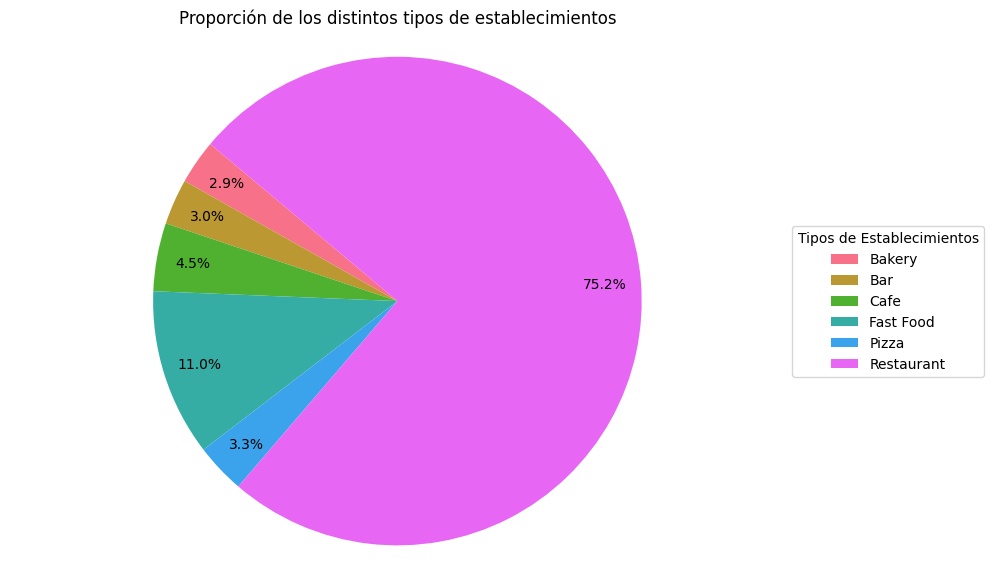

In [8]:
# Crear una paleta de colores

colors = sns.color_palette('husl', len(proporcion_establecimientos))

# Configuración para el gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Crear el gráfico circular
wedges, texts, autotexts = ax.pie(
    proporcion_establecimientos['number'],
    labels=None,  # No mostrar nombres de los tipos de establecimientos en el gráfico
    autopct='%1.1f%%',  # Mostrar solo los porcentajes
    startangle=140,
    colors=colors,
    pctdistance=0.85  # Distancia de los porcentajes al centro
)

# Añadir título
ax.set_title('Proporción de los distintos tipos de establecimientos')

# Añadir una leyenda
ax.legend(
    wedges,
    proporcion_establecimientos['object_type'],
    title="Tipos de Establecimientos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Ajuste de la ubicación de la leyenda
)

# Ajustar el aspecto del gráfico a un círculo
ax.axis('equal')

# Mostrar gráfico
plt.show()

Del gráfico se observa que la mayor proporción corresponde al tipo de establecimiento "Restaurant" con un 75,2%, luego con un 11% tenemos a "Fast food". La menor proporción corresponde al tipo "Bakery" con el 2,9%.

**Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico**

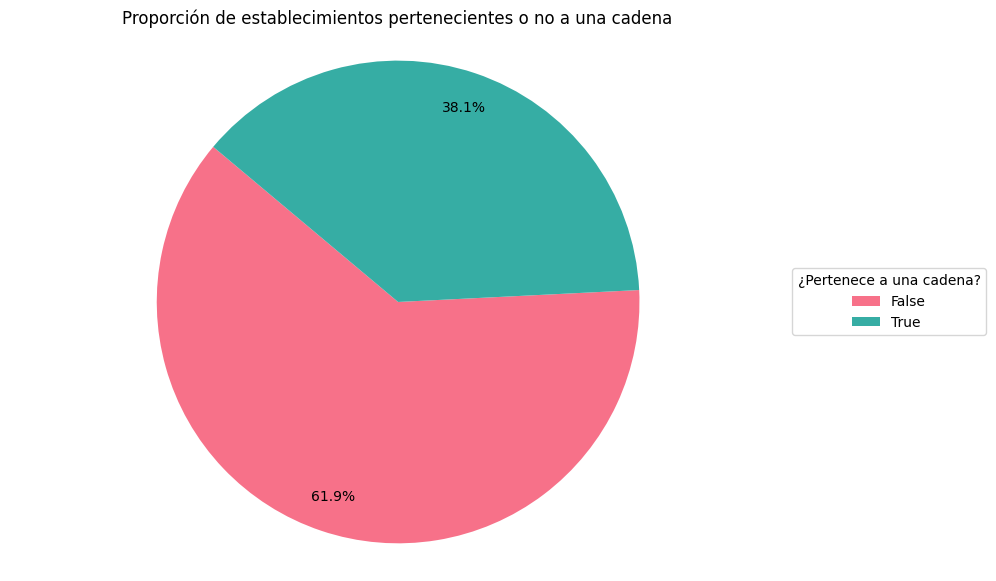

In [9]:
chain_no_chain = data_rest.groupby("chain").agg({"number":"count"}).reset_index()

# Crear una paleta de colores

colors = sns.color_palette('husl', len(chain_no_chain))

# Configuración para el gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Crear el gráfico circular
wedges, texts, autotexts = ax.pie(
    chain_no_chain['number'],
    labels=None,  # No mostrar nombres de los tipos de establecimientos en el gráfico
    autopct='%1.1f%%',  # Mostrar solo los porcentajes
    startangle=140,
    colors=colors,
    pctdistance=0.85  # Distancia de los porcentajes al centro
)

# Añadir título
ax.set_title('Proporción de establecimientos pertenecientes o no a una cadena')

# Añadir una leyenda
ax.legend(
    wedges,
    chain_no_chain['chain'],
    title="¿Pertenece a una cadena?",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Ajuste de la ubicación de la leyenda
)

# Ajustar el aspecto del gráfico a un círculo
ax.axis('equal')

# Mostrar gráfico
plt.show()

**¿Qué tipo de establecimiento es habitualmente una cadena?**

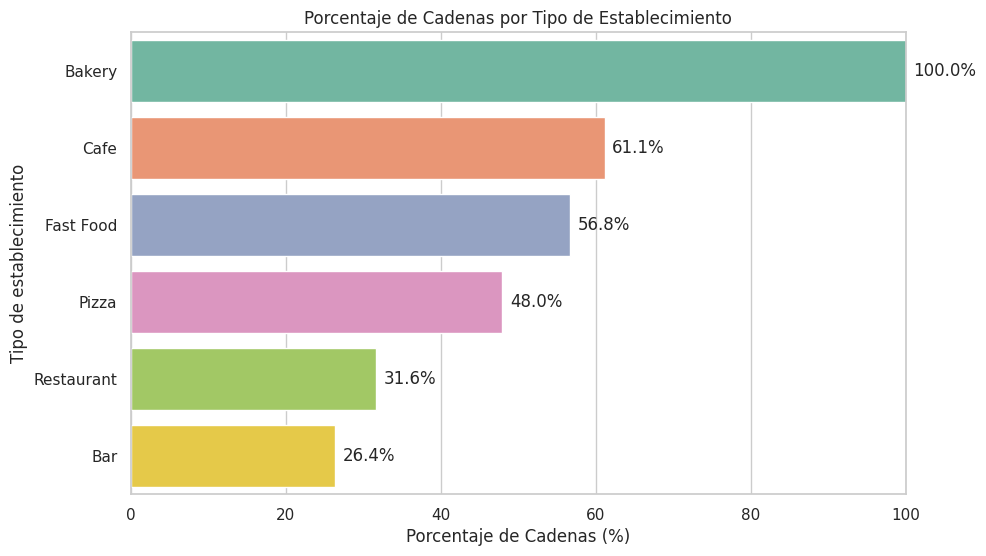

In [10]:
# Agrupar por tipo de establecimiento y calcular el porcentaje de cadenas
grouped = data_rest.groupby('object_type').agg(
    total=('chain', 'size'),
    total_cadenas=('chain', lambda x: x.sum())
).reset_index()

# Calcular el porcentaje de cadenas
grouped['porcentaje_cadenas'] = (grouped['total_cadenas'] / grouped['total']) * 100

# Ordenar el DataFrame en forma descendente
grouped = grouped.sort_values(by='porcentaje_cadenas', ascending=False)

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear la gráfica con una paleta de colores más variada
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2", len(grouped))  # Paleta de colores

bar_plot = sns.barplot(
    x='porcentaje_cadenas',
    y='object_type',
    data=grouped,
    palette=palette
)

# Agregar etiquetas en las barras
for index, value in enumerate(grouped['porcentaje_cadenas']):
    bar_plot.text(value + 1, index, f'{value:.1f}%', va='center')

plt.xlabel('Porcentaje de Cadenas (%)')
plt.ylabel('Tipo de establecimiento')
plt.title('Porcentaje de Cadenas por Tipo de Establecimiento')
plt.xlim(0, 100)  # Ajustar el límite del eje x
plt.show()

- Bakery es el tipo de establecimiento que habitualmente es una cadena, con un 100% de los establecimientos perteneciendo a cadenas.
- Cafés y Fast Food también son notablemente cadenas, con más del 60% de los establecimientos en estas categorías siendo parte de cadenas.
- Pizzerías y Restaurantes tienen porcentajes significativos, pero ya no son considerados predominantemente cadenas, especialmente los restaurantes, donde solo el 31.60% son cadenas.


**¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?**

In [11]:
chain = data_rest[data_rest["chain"] == True]

In [12]:
chain["number"].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

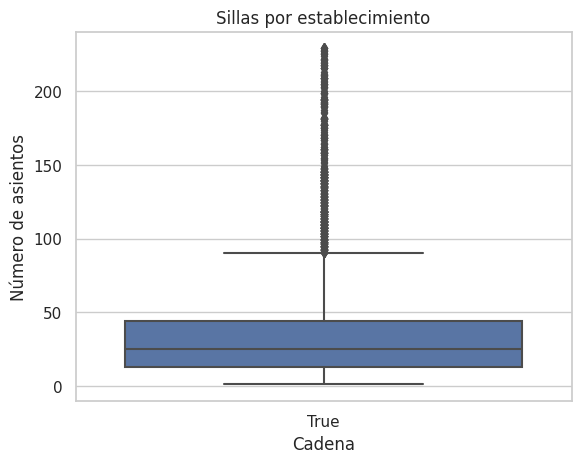

In [13]:
#Diagrama de cajas para establecimientos de cadena

sns.boxplot(data=chain,x="chain",y="number")
plt.title("Sillas por establecimiento")
plt.xlabel("Cadena")
plt.ylabel("Número de asientos")
plt.show()

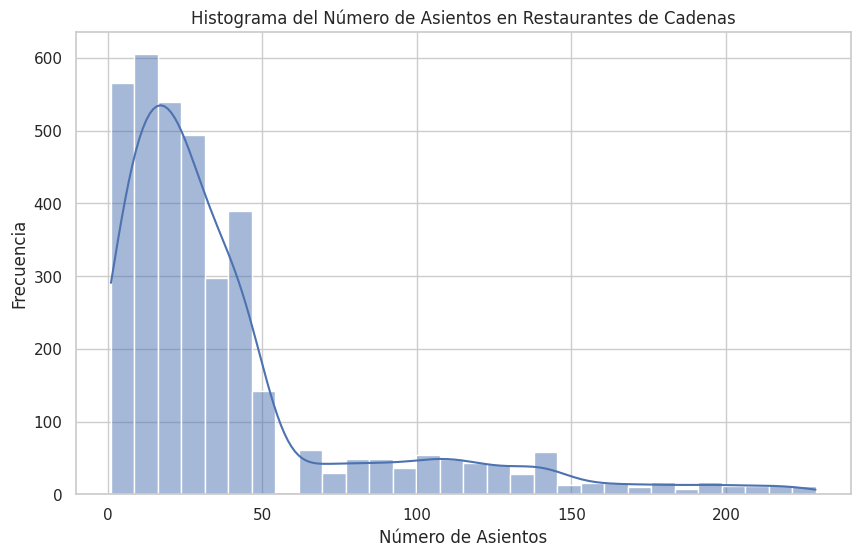

In [14]:
# Filtra los restaurantes que pertenecen a una cadena
chain_restaurants = data_rest[data_rest['chain'] == True]

# Crea el histograma del número de asientos
plt.figure(figsize=(10, 6))
sns.histplot(chain_restaurants['number'], bins=30, kde=True)

# Añade títulos y etiquetas
plt.title('Histograma del Número de Asientos en Restaurantes de Cadenas')
plt.xlabel('Número de Asientos')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

Media vs. Mediana: La media (39.69) es mayor que la mediana (25), lo que sugiere que hay algunos establecimientos con un número de asientos significativamente mayor que el promedio, lo que puede estar influyendo en la media.

Desviación estándar alta: Una desviación estándar de 43.44 indica que hay una amplia variabilidad en el número de asientos entre los establecimientos de cadena. Esto significa que algunos tienen muchos asientos, mientras que otros tienen muy pocos.

La existencia de un mínimo de 1 asiento y un máximo de 229 asientos sugiere que hay una mezcla de establecimientos muy pequeños y algunos grandes.

El cuartil 1 (13 asientos) y el cuartil 3 (44 asientos) muestran que el 50% de los establecimientos tiene entre 13 y 44 asientos, lo que significa que hay una buena cantidad de establecimientos pequeños (con menos de 25 asientos).

La estadística sugiere que hay muchos establecimientos con un número relativamente pequeño de asientos (especialmente si consideramos que el 50% tiene menos de 25 asientos). Sin embargo, también hay algunos pocos establecimientos que tienen un número significativamente alto de asientos (hasta 229), lo que podría estar afectando la media.

En resumen, se puede caracterizar a las cadenas como compuestas principalmente por muchos establecimientos con un número de asientos relativamente pequeño, pero también incluyen algunos establecimientos grandes. Esto sugiere que el modelo de negocio de estas cadenas puede ser diverso, atrayendo tanto a clientes en locales pequeños como a aquellos que buscan espacios más grandes.

**Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos**

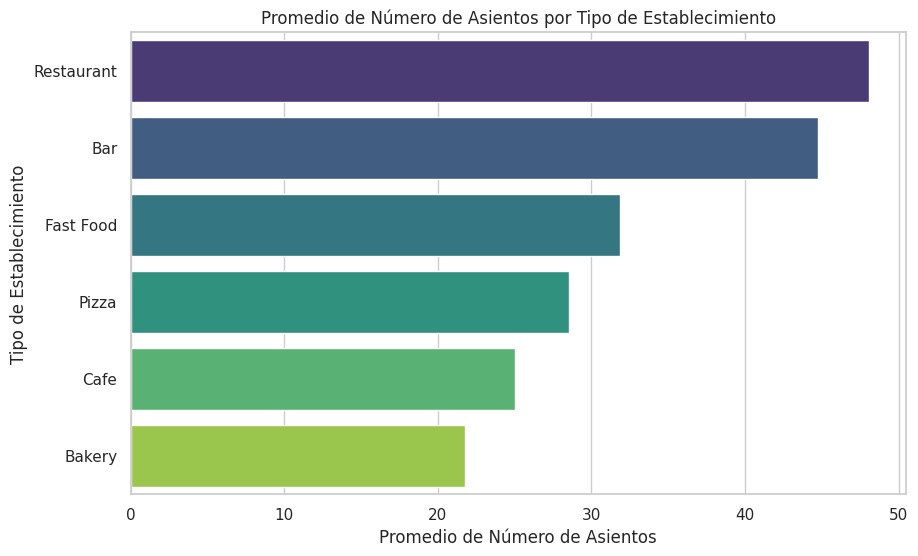

In [15]:
# Calcula el promedio de número de asientos por tipo de establecimiento
avg_seats_by_type = data_rest.groupby('object_type')['number'].mean().reset_index()

# Ordena el DataFrame de forma descendente
avg_seats_by_type = avg_seats_by_type.sort_values(by='number', ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='number', y='object_type', data=avg_seats_by_type, palette='viridis')

# Añade títulos y etiquetas
plt.title('Promedio de Número de Asientos por Tipo de Establecimiento')
plt.xlabel('Promedio de Número de Asientos')
plt.ylabel('Tipo de Establecimiento')

# Muestra el gráfico
plt.show()

Se observa que el mayor promediod e número de asientos por tipo de establecimiento corresponde al tipo "Restaurant", mientras que el menor corresponde a "Bakery".

**Coloca los datos de los nombres de las calles de la columna address en una columna separada**

In [16]:
# Crear una función para separar el número de la dirección
def separar_direccion(direccion):
    # Utilizamos una expresión regular para separar el número de la dirección
    partes = direccion.split(" ", 1)  # Separar en el primer espacio
    if len(partes) > 1:
        return partes[0], partes[1]  # Retorna el número y la dirección
    return partes[0], ''  # En caso de que no haya dirección

# Aplicar la función y crear nuevas columnas
data_rest[['numero_street', 'street']] = data_rest['address'].apply(lambda x: pd.Series(separar_direccion(x)))

# Mostrar el DataFrame con las nuevas columnas
print(data_rest.head())

      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number numero_street              street  
0      26          3708   N EAGLE ROCK BLVD  
1       9           100       WORLD WAY 120  
2      20          6801  HOLLYWOOD BLVD 253  
3      22          1814       W SUNSET BLVD  
4      20          2100       ECHO PARK AVE  


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Traza un gráfico de las diez mejores calles por número de restaurantes**

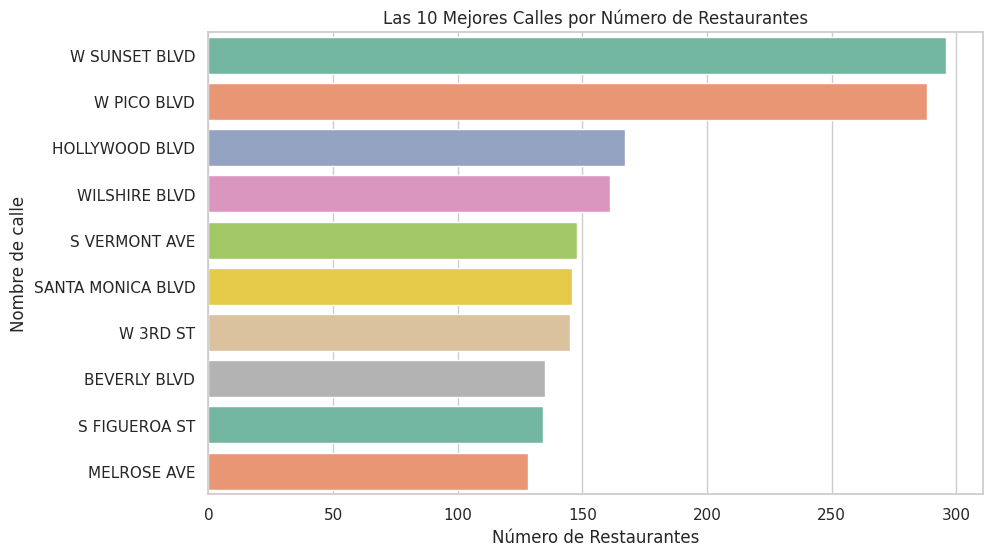

In [17]:
# Agrupar por calle y contar los restaurantes
rest_per_street = data_rest.groupby("street").agg({"object_name": "count"}).reset_index()
rest_per_street = rest_per_street.rename(columns={"object_name": "num_restaurantes"}).sort_values(by="num_restaurantes", ascending=False)

# Seleccionar las 10 mejores calles
top_streets = rest_per_street.head(10)

# Trazar el gráfico con seaborn y una paleta de colores más variada
plt.figure(figsize=(10, 6))
sns.barplot(x='num_restaurantes', y='street', data=top_streets, palette='Set2')
plt.xlabel('Número de Restaurantes')
plt.ylabel('Nombre de calle')
plt.title('Las 10 Mejores Calles por Número de Restaurantes')
plt.show()

Las calles "W SUNSET BLVD" y "W PICO BLVS" son las que contienen la mayor cantidad de restaurantes.

**Encuentra el número de calles que solo tienen un restaurante**

In [18]:
# Agrupar por calle y contar el número de restaurantes
rest_per_street = data_rest.groupby("street").agg({"object_name": "count"}).reset_index()
rest_per_street = rest_per_street.rename(columns={"object_name": "num_restaurantes"})

# Filtrar las calles que solo tienen un restaurante
calle_un_restaurante = rest_per_street[rest_per_street['num_restaurantes'] == 1]

# Contar el número de calles que solo tienen un restaurante
num_calles_un_restaurante = len(calle_un_restaurante)

# Contar el número total de calles
num_calles_totales = len(rest_per_street)

# Calcular el porcentaje
porcentaje_calles_un_restaurante = (num_calles_un_restaurante / num_calles_totales) * 100

# Mostrar resultados
print(f"Número de calles que solo tienen un restaurante: {num_calles_un_restaurante}")
print(f"Porcentaje respecto al total: {porcentaje_calles_un_restaurante:.2f}%")

Número de calles que solo tienen un restaurante: 2450
Porcentaje respecto al total: 79.62%


**Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?**

Para este análisis tomaremos los 5 principales calles, es decir, aquellas que tienen mayor cantidad de asientos.

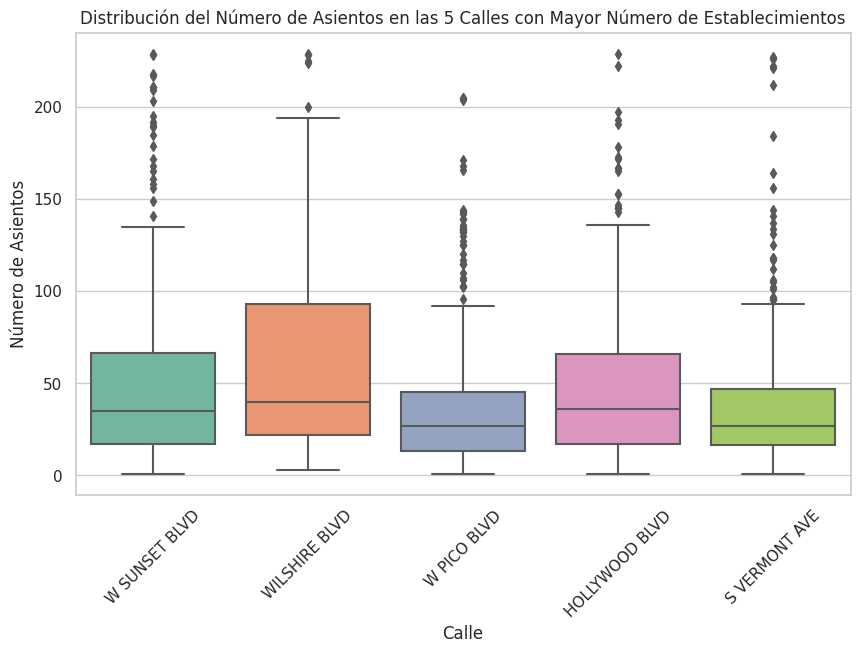

                count       mean        std  min    25%   50%    75%    max
street                                                                     
HOLLYWOOD BLVD  167.0  53.730539  53.512912  1.0  17.00  36.0  66.00  229.0
S VERMONT AVE   148.0  45.878378  50.974571  1.0  16.25  27.0  47.00  227.0
W PICO BLVD     288.0  40.878472  41.772352  1.0  13.00  27.0  45.00  205.0
W SUNSET BLVD   296.0  50.918919  50.484502  1.0  17.00  35.0  66.25  229.0
WILSHIRE BLVD   161.0  62.130435  57.475879  3.0  22.00  40.0  93.00  229.0


In [19]:
# Agrupar por calle y contar el número de establecimientos
establishments_per_street = data_rest.groupby("street").agg({"object_name": "count", "number": "sum"}).reset_index()
establishments_per_street = establishments_per_street.rename(columns={"object_name": "num_establecimientos", "number": "total_asientos"})

# Seleccionar las 5 calles con mayor número de establecimientos
top_streets = establishments_per_street.nlargest(5, 'num_establecimientos')

# Filtrar el DataFrame original para obtener solo los restaurantes en estas calles
data_top_streets = data_rest[data_rest['street'].isin(top_streets['street'])]

# Trazar la distribución del número de asientos
plt.figure(figsize=(10, 6))
sns.boxplot(x='street', y='number', data=data_top_streets, palette='Set2')
plt.xlabel('Calle')
plt.ylabel('Número de Asientos')
plt.title('Distribución del Número de Asientos en las 5 Calles con Mayor Número de Establecimientos')
plt.xticks(rotation=45)
plt.show()

# Análisis descriptivo adicional
print(data_top_streets.groupby('street')['number'].describe())

Conteo: W SUNSET BLVD tiene el mayor número de establecimientos (296), seguido de W PICO BLVD (288). Esto indica que estas calles son muy activas en términos de restaurantes.

Media: La media del número de asientos varía entre las calles. WILSHIRE BLVD tiene la media más alta (62.13), lo que sugiere que, en promedio, los restaurantes en esta calle tienen más asientos que en las otras.
En contraste, W PICO BLVD tiene la media más baja (40.88).

La desviación estándar es alta en varias calles (por ejemplo, WILSHIRE BLVD tiene 57.48), lo que indica que hay una amplia variabilidad en el número de asientos. Esto sugiere que hay algunos restaurantes muy grandes o pequeños en comparación con otros.
En W PICO BLVD, la desviación estándar es más baja (41.77), lo que indica que los números de asientos son más consistentes.

Valores extremos: En todas las calles, el mínimo es 1, lo que muestra que hay restaurantes muy pequeños. Sin embargo, el máximo es notablemente alto en varias calles, como HOLLYWOOD BLVD, W SUNSET BLVD y WILSHIRE BLVD (229), lo que sugiere la presencia de restaurantes grandes.
Esto puede indicar una mezcla de establecimientos, desde pequeños locales hasta grandes restaurantes.

Cuartiles: El 75% de los restaurantes en WILSHIRE BLVD tienen 93 asientos o menos, lo que implica que, aunque hay algunos restaurantes muy grandes, la mayoría son más pequeños en comparación.
S VERMONT AVE muestra un 25% de los restaurantes con solo 16.25 asientos, lo que puede indicar una alta presencia de pequeños establecimientos.

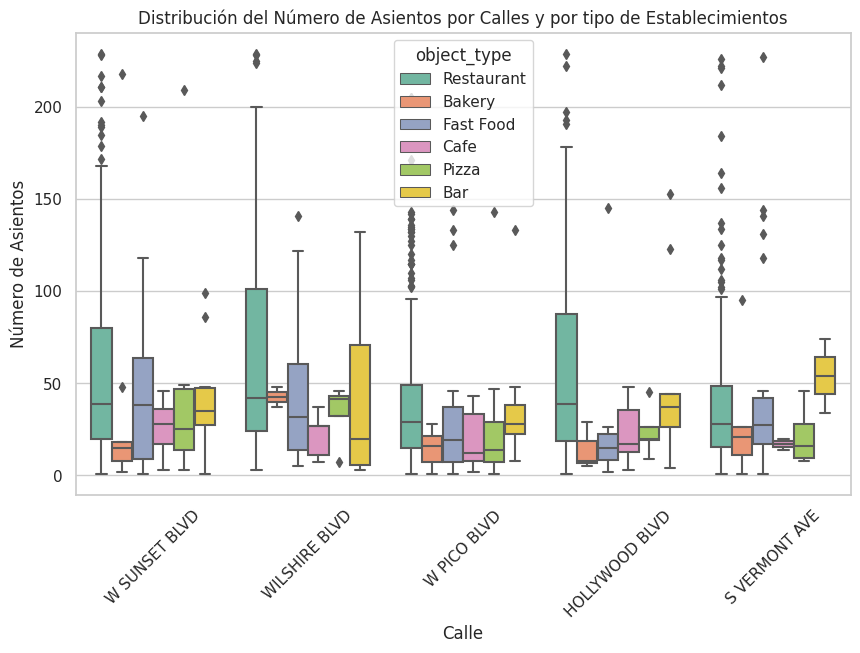

In [20]:
# Trazar la distribución del número de asientos
plt.figure(figsize=(10, 6))
sns.boxplot(x='street', y='number', data=data_top_streets, palette='Set2', hue = "object_type")
plt.xlabel('Calle')
plt.ylabel('Número de Asientos')
plt.title('Distribución del Número de Asientos por Calles y por tipo de Establecimientos')
plt.xticks(rotation=45)
plt.show()

Como análisis complementario, se observa que el tipo de establecimiento "Restaurant" presenta la mayor cantidad de asientos, además de tener la mayor proporción de número de restaurantes en los datos analizados.

**Conclusiones:**
    
- Diversidad en tamaños: Las calles analizadas tienen una mezcla de restaurantes pequeños y grandes, lo que podría atraer a diferentes tipos de clientela.
    
- Hollywood y Sunset son áreas con un gran número de establecimientos, lo que puede reflejar un alto tráfico peatonal o un atractivo turístico.

- WILSHIRE BLVD destaca por tener, en promedio, más asientos, lo que puede ser atractivo para grupos más grandes.

- Para los inversionistas, sería preferible en invertir en tipos de establecimiento como Restaurantes y en menor medida del    tipo "Bakery", esto tomando como creiterio la cantidad de asientos y número de establecimientos por tipo.

# Presentación a inversionistas



https://drive.google.com/file/d/1WSPHQeZBLWJiF-RCymZXvsApe5wKgiVz/view?usp=drive_link